# Unsupervised Clustering: K-Means, K-Medoids, and Agglomerative Clustering

This notebook provides a detailed guide to several popular unsupervised clustering algorithms. We will cover:

1.  **Detailed Explanation**: A deep dive into the mechanics of K-Means, K-Medoids, and Agglomerative Hierarchical Clustering.
2.  **Evaluation Metrics**: Understanding how to evaluate the performance of a clustering algorithm without ground truth labels.
3.  **Practical Usecase**: Using `scikit-learn` to apply these algorithms to a synthetic dataset.
4.  **Implementation from Scratch**: Building the K-Means algorithm from scratch to understand its core logic.

## 1. Detailed Explanation of Algorithms

### K-Means Clustering

**Core Idea**: K-Means partitions `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).

**How it Works:**
1.  **Initialization**: Randomly select `k` data points from the dataset to act as the initial centroids.
2.  **Assignment Step**: Assign each data point to the cluster of its nearest centroid, based on Euclidean distance.
3.  **Update Step**: Recalculate the centroid of each cluster by taking the mean of all data points assigned to it.
4.  **Iteration**: Repeat the Assignment and Update steps until the centroids no longer move significantly or a maximum number of iterations is reached.

**Pros**: Fast, scalable, and simple to understand.
**Cons**: Sensitive to the initial placement of centroids, assumes spherical clusters of similar size, and can be impacted by outliers.

### K-Medoids Clustering (Partitioning Around Medoids - PAM)

**Core Idea**: K-Medoids is similar to K-Means, but with a crucial difference: the cluster centers (medoids) must be **actual data points** from the dataset.

**How it Works:**
1.  **Initialization**: Randomly select `k` data points from the dataset to be the medoids.
2.  **Assignment Step**: Assign each data point to the cluster of its nearest medoid.
3.  **Update Step**: For each cluster, iteratively swap the medoid with a non-medoid point in the same cluster. If the swap reduces the total sum of distances within the cluster, the swap is kept.
4.  **Iteration**: Repeat until no swap can improve the total distance.

**Pros**: More robust to outliers and noise than K-Means because it uses medoids instead of means.
**Cons**: Computationally more expensive than K-Means, especially on large datasets.

### Agglomerative Hierarchical Clustering

**Core Idea**: This is a "bottom-up" approach. Each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

**How it Works:**
1.  **Initialization**: Start with each data point as its own cluster (N clusters in total).
2.  **Merge**: Find the two closest clusters and merge them into a single cluster.
3.  **Iteration**: Repeat the merge step until only one cluster remains.

The key to this algorithm is the **linkage criterion**, which defines how the distance between clusters is measured:
-   **Ward (default in scikit-learn)**: Minimizes the variance of the clusters being merged.
-   **Complete Linkage**: Uses the maximum distance between points in the two clusters.
-   **Average Linkage**: Uses the average distance between all pairs of points in the two clusters.

The result is a tree-based representation of the objects, called a **dendrogram**.

## 2. Evaluation Metrics for Clustering

Since we don't have true labels, we use metrics that measure the quality of the clusters themselves.

-   **Silhouette Score**: Measures how similar a point is to its own cluster compared to other clusters. 
    -   Ranges from -1 to 1. 
    -   A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

-   **Davies-Bouldin Score**: Measures the average similarity between each cluster and its most similar one. 
    -   The lower the score, the better the clustering. A score of 0 indicates perfect clustering.

## 3. Practical Usecase with `scikit-learn`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids # KMedoids is in scikit-learn-extra
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Note: You may need to install scikit-learn-extra
# !pip install scikit-learn-extra

### Data Generation

We'll create synthetic data with 3 distinct blobs.

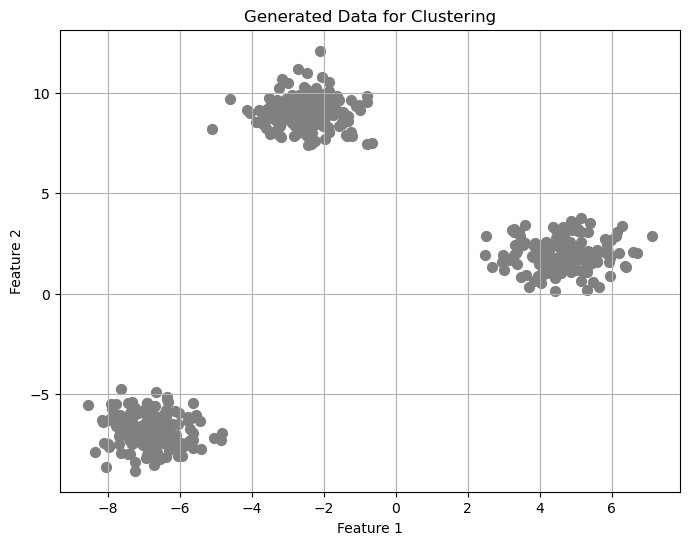

In [3]:
n_samples = 500
n_clusters = 3

X, y_true = make_blobs(n_samples=n_samples, 
                       centers=n_clusters, 
                       cluster_std=0.8,
                       random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title('Generated Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### Applying Clustering Algorithms

In [4]:
# --- K-Means --- 
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# --- K-Medoids ---
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

# --- Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=n_clusters)
y_agglo = agglo.fit_predict(X)

# --- Evaluation ---
models = {
    'K-Means': y_kmeans,
    'K-Medoids': y_kmedoids,
    'Agglomerative': y_agglo
}

for name, labels in models.items():
    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    print(f'--- {name} ---')
    print(f'Silhouette Score: {sil_score:.4f}')
    print(f'Davies-Bouldin Score: {db_score:.4f}\n')

c:\Apps\miniconda3\envs\mlops-env\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Apps\miniconda3\envs\mlops-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


--- K-Means ---
Silhouette Score: 0.8751
Davies-Bouldin Score: 0.1772

--- K-Medoids ---
Silhouette Score: 0.8751
Davies-Bouldin Score: 0.1772

--- Agglomerative ---
Silhouette Score: 0.8751
Davies-Bouldin Score: 0.1772



### Visualize Clustering Results

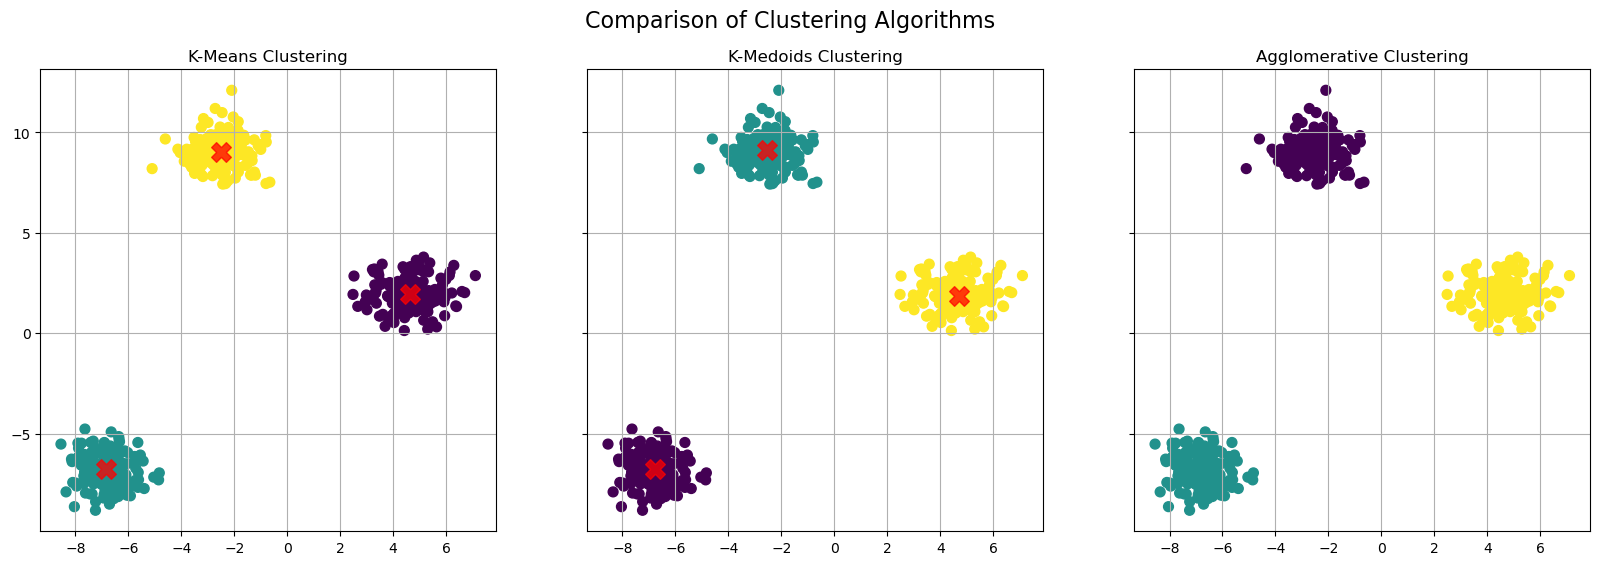

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# K-Means Plot
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers_kmeans = kmeans.cluster_centers_
axes[0].scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[0].set_title('K-Means Clustering')
axes[0].grid(True)

# K-Medoids Plot
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmedoids, s=50, cmap='viridis')
centers_kmedoids = kmedoids.cluster_centers_
axes[1].scatter(centers_kmedoids[:, 0], centers_kmedoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[1].set_title('K-Medoids Clustering')
axes[1].grid(True)

# Agglomerative Plot
axes[2].scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='viridis')
axes[2].set_title('Agglomerative Clustering')
axes[2].grid(True)

plt.suptitle('Comparison of Clustering Algorithms', fontsize=16)
plt.show()

## 4. K-Means from Scratch

Now, let's implement the K-Means algorithm from scratch to understand its inner workings. We will focus on the core `fit` logic.

In [6]:
class KMeansScratch:
    """K-Means implementation from scratch."""
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        """Randomly initialize centroids from the data points."""
        np.random.seed(self.random_state)
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

    def _assign_clusters(self, X):
        """Assign each data point to the closest centroid."""
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        """Update centroids to be the mean of the assigned points."""
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return new_centroids

    def fit(self, X):
        """Run the K-Means algorithm."""
        self._initialize_centroids(X)
        
        for i in range(self.max_iter):
            # Assignment step
            labels = self._assign_clusters(X)
            
            # Update step
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                print(f"Converged at iteration {i+1}")
                break
            
            self.centroids = new_centroids
            
        return labels

### Run the Scratch Implementation

--- Running K-Means from Scratch ---
Converged at iteration 11
Silhouette Score: 0.5287
Davies-Bouldin Score: 0.8592



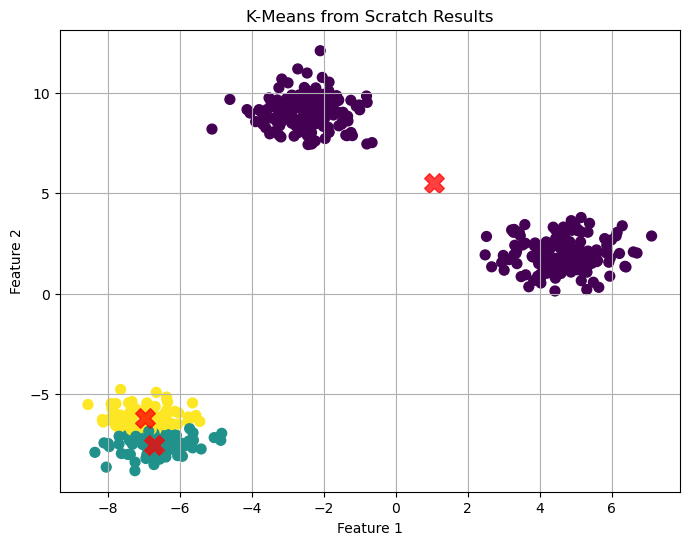

In [14]:
print("--- Running K-Means from Scratch ---")
scratch_kmeans = KMeansScratch(n_clusters=n_clusters, random_state=42)
y_scratch = scratch_kmeans.fit(X)

# Evaluate the scratch model
sil_score_scratch = silhouette_score(X, y_scratch)
db_score_scratch = davies_bouldin_score(X, y_scratch)

print(f'Silhouette Score: {sil_score_scratch:.4f}')
print(f'Davies-Bouldin Score: {db_score_scratch:.4f}\n')

# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_scratch, s=50, cmap='viridis')
plt.scatter(scratch_kmeans.centroids[:, 0], scratch_kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means from Scratch Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

--- Running K-Means from Scratch ---
Converged at iteration 2
Silhouette Score: 0.8751
Davies-Bouldin Score: 0.1772



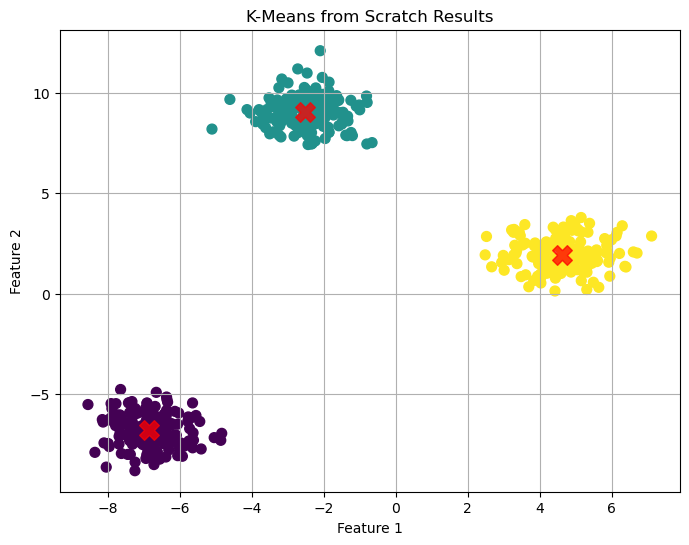

In [15]:
print("--- Running K-Means from Scratch ---")
scratch_kmeans = KMeansScratch(n_clusters=n_clusters, random_state=3)
y_scratch = scratch_kmeans.fit(X)

# Evaluate the scratch model
sil_score_scratch = silhouette_score(X, y_scratch)
db_score_scratch = davies_bouldin_score(X, y_scratch)

print(f'Silhouette Score: {sil_score_scratch:.4f}')
print(f'Davies-Bouldin Score: {db_score_scratch:.4f}\n')

# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_scratch, s=50, cmap='viridis')
plt.scatter(scratch_kmeans.centroids[:, 0], scratch_kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means from Scratch Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()